<a href="https://colab.research.google.com/github/ntlt/AI-PROJECT/blob/main/CNN_FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD



In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/train'


In [7]:
x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)


In [8]:
x_train_data = x_train.flow_from_directory(directory=r"/content/drive/MyDrive/train",
                                    target_size=(224, 224),batch_size=10,class_mode="categorical",color_mode="rgb",)
x_test_data  = x_test.flow_from_directory(directory=r"/content/drive/MyDrive/train",
                                   target_size=(224, 224),batch_size=10,class_mode="categorical",color_mode="rgb",)


Found 218 images belonging to 7 classes.
Found 218 images belonging to 7 classes.


In [9]:
x_train_data.class_indices

{'Gia_Han': 0,
 'Linh_Trang': 1,
 'Ngoc_Mai': 2,
 'Nhu_Quynh': 3,
 'Thuyen_Ha': 4,
 'Truc_Anh': 5,
 'Van_Minh': 6}

In [10]:

model=Sequential()
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(224,224,3)))
model.add(Conv2D(4,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2500,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(500,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(7,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 13)      364       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 4)       472       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 4)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1000)              50177000  
                                                                 
 dense_1 (Dense)             (None, 5000)              5005000   
                                                        

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_data,epochs=20,batch_size=20
                  ,verbose=1,validation_data=x_test_data)


Epoch 1/20
22/22 [==============================] - 82s 3s/step - loss: 21.1917 - accuracy: 0.2936 - val_loss: 1.3071 - val_accuracy: 0.4128
Epoch 2/20
22/22 [==============================] - 17s 802ms/step - loss: 0.8545 - accuracy: 0.6193 - val_loss: 0.4836 - val_accuracy: 0.8624
Epoch 3/20
22/22 [==============================] - 17s 796ms/step - loss: 0.3050 - accuracy: 0.9083 - val_loss: 0.0717 - val_accuracy: 0.9954
Epoch 4/20
22/22 [==============================] - 17s 794ms/step - loss: 0.0437 - accuracy: 0.9908 - val_loss: 0.0221 - val_accuracy: 0.9954
Epoch 5/20
22/22 [==============================] - 17s 790ms/step - loss: 7.3041e-04 - accuracy: 1.0000 - val_loss: 2.5086e-04 - val_accuracy: 1.0000
Epoch 6/20
22/22 [==============================] - 17s 788ms/step - loss: 1.2479e-04 - accuracy: 1.0000 - val_loss: 2.6315e-05 - val_accuracy: 1.0000
Epoch 7/20
22/22 [==============================] - 19s 868ms/step - loss: 1.6227e-05 - accuracy: 1.0000 - val_loss: 1.0022e-05 

In [12]:
model.save('Face.h5')

In [13]:
score=model.evaluate(x_test_data,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])


22/22 [==============================] - 9s 391ms/step - loss: 6.7533e-07 - accuracy: 1.0000
Test loss= 6.753271577508713e-07
Test accuracy= 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

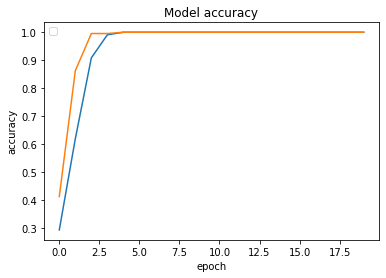

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()


In [15]:
from keras.models import load_model
Face = load_model('Face.h5')


This is:  Thuyen Ha


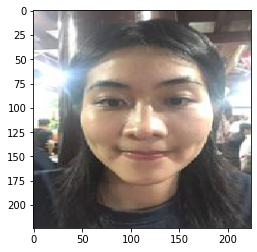

In [16]:
labels = {0: 'Han', 1: 'Trang', 2: 'Mai', 3: 'Nhu Quynh', 4: 'Thuyen Ha', 
          5:'Truc Anh', 6:'Van Minh'}
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/train/Thuyen_Ha/Ha (1).jpg',
               target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
val = Face.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  Han


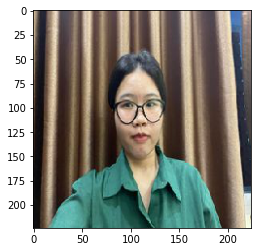

In [17]:
labels = {0: 'Han', 1: 'Trang', 2: 'Mai', 3: 'Nhu Quynh', 4: 'Thuyen Ha', 5:'Truc Anh', 6:'Van Minh'}
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/train/Gia_Han/anh1 (10).jpg', target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
val = Face.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])